# Introduction to <font color= #b30047>[Keras](https://keras.io/)</font> using the Font type Recognition Example
<img src=https://s3.amazonaws.com/keras.io/img/keras-logo-2018-large-1200.png width=200 height = 70>


* <font size=5 color='green'>[MSTC](http://mstc.ssr.upm.es/big-data-track) seminar on Deep Learning, Tensorflow & Keras</font>

## Keras: The Python Deep Learning library

Keras was initially developed as part of the research effort of project ONEIROS (Open-ended Neuro-Electronic Intelligent Robot Operating System).

**Keras (κέρας) means horn in Greek.**

    In the Odyssey dream spirits are divided between those who deceive men with false visions, who arrive to Earth through a gate of ivory, and those who announce a future that will come to pass, who arrive through a gate of horn. 
    


## Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano.

**It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.**

Guiding principles:

-   User friendliness.
    
-   Modularity. A model is understood as a sequence or a graph of standalone, fully-configurable modules that can be plugged together with as little restrictions as possible.

-   Easy extensibility. New modules are simple to add (as new classes and functions).

-   Work with Python. Keras is compatible with: Python 2.7-3.6 .


## Import <font color= #b30047>[Keras](https://keras.io/)</font> as Python package

    Notice that we will use a TensorFlow backend

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [2]:
print(keras.__version__)

2.1.6


## <font color= #00cc00>Next cells load the Font Type dataset:</font>

    ... same as in TensorFlow Notebook

In [0]:
import numpy as np

# Import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
"""
Load and data
"""

import os
from six.moves import urllib

file_url = 'https://github.com/bloolizard/PlayWithTensorFlow/raw/master/data_with_labels.npz'
file_name = 'data_with_labels.npz'

if not os.path.exists(file_name):
    urllib.request.urlretrieve(file_url, file_name)
    
    
# Load data
data = np.load('data_with_labels.npz')

train = data['arr_0']/255.
labels = data['arr_1']

## Beyond Layers and Models [Keras](https://keras.io/) provides many usefull tools such as:
- ###  image and text preprocessing, metrics, Scikit-learn API, utilities, ... (see Keras Documentation)
### <font color= #00cc00>In the next cell:</font>
    One-Hot-Encoding of labels using Keras (see https://keras.io/utils/#to_categorical)

In [0]:
from keras.utils import to_categorical
onehot= to_categorical(labels, num_classes=len(np.unique(labels)))


In [6]:
print(onehot[0:5])

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


### Permutation! + split data into training / validation

In [0]:
 
# Split data into training (90%) and validation (10%)
np.random.seed(100)

indices = np.random.permutation(train.shape[0])

valid_cnt = int(train.shape[0] * 0.1)

test_idx, training_idx = indices[:valid_cnt],\
                         indices[valid_cnt:]
  
test, train = train[test_idx,:],\
              train[training_idx,:]
  
onehot_test, onehot_train = onehot[test_idx,:],\
                        onehot[training_idx,:]
  

In [8]:
print('Train shape=', train.shape , '\nTest shape=', test.shape)

Train shape= (2511, 36, 36) 
Test shape= (279, 36, 36)


### Reshape to represent each image as a vector

In [0]:
train=train.reshape([-1,train.shape[1]*train.shape[2]])
test=test.reshape([-1,test.shape[1]*test.shape[2]])

In [10]:
print('Train shape=', train.shape , '\nTest shape=', test.shape)

Train shape= (2511, 1296) 
Test shape= (279, 1296)


# <font color= #b30047>[Keras](https://keras.io/) Models </font>

- ## The core data structure of Keras is a model, a way to organize layers.


## The construction of deep learning models in Keras is as follows:

1.   **Define your model**. Create a sequence and add layers.
2.   **Compile your model**. Specify loss functions and optimizers
3.   **Fit your model**. Execute the model using data.
4.   **Make predictions**. Use the model to generate predictions on new data.






## 1.   **Define your model**. Create a sequence and add layers.

* The simplest type of model is the <font color= #b30047>**Sequential**</font> model: a linear stack of layers.

For more complex architectures, you should use the <font color= #b30047>**Keras functional API**</font>, which allows to build arbitrary graphs of layers.


In [0]:
from keras.models import Sequential

model = Sequential()


* Stacking layers is as easy as <font color= #b30047>**.add()**</font>

      To stack layers you must first import the types of layers you want: in our case Dense (we could also add Dropout, Activation)
      

In [0]:
from keras.layers import Dense


model.add(Dense(128, activation='relu', input_dim=train.shape[1]))
# Dense(128) is a fully-connected layer with 128 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 1296-dimensional vectors.


model.add(Dense(32, activation='sigmoid'))

## onehot_train.shape[1] is the number of classes
model.add(Dense(onehot_train.shape[1], activation='softmax'))

### ... adding more layers is easy (try uncommenting options in this cell)

In [13]:
#from keras.layers import Dense, Dropout, Activation


#model.add(Dense(128, activation='relu', input_dim=train.shape[1]))
## Dense(128) is a fully-connected layer with 128 hidden units.
## in the first layer, you must specify the expected input data shape:
3# here, 1296-dimensional vectors.

#model.add(Dropout(0.5))
#model.add(Dense(32, activation='relu'))

#model.add(Dense(32, activation='sigmoid'))
#model.add(Dropout(0.5))

## onehot_train.shape[1] is the number of classes
#model.add(Dense(onehot_train.shape[1], activation='softmax'))


3

## Note that differently from TensorFlow:

* Declaring the **input shape** is only required of the **first layer** – Keras is good enough to work out the size of the tensors flowing through the model from there.

* We don’t have to declare any **weights** or **bias** variables like we do in TensorFlow.

## We can now define what type of <font color= #b30047>**optimizer**</font> to use (i.e. gradient descent, Adam optimiser etc.).

*  Although optimizer (and loss function) can be also defined when compiling the model.



In [0]:
from keras.optimizers import SGD


sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

## 2.   **Compile your model**. Specify loss functions and optimizers

### FROM:

<img src=https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2017/07/Long-Short-Term-Memory-Networks-With-Python.png width=250 height=300>
<br>
*Once we have dened our network, we must compile it. Compilation is an eficiency step. It
transforms the simple sequence of layers that we dened into a highly eficient series of matrix
transforms in a format intended to be executed on your GPU or CPU, depending on how Keras
is congured. Think of compilation as a precompute step for your network. It is always required
after dening a model.*

In [0]:


model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

### Compilation requires a number of parameters to be specified, specifically tailored to training your network:
* the **optimization algorithm** to use to train the network 
* and the **loss function** used to evaluate the network that is minimized by the optimization algorithm.

      You can also specify metrics to collect while fitting your model in addition to the loss function. Generally, the most useful additional metric to collect is accuracy for classification problems (e.g. `accuracy' or `acc' for short). The metrics to collect are specified by name in an array of metric or loss function names, for example metrics=['accuracy']

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               166016    
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 165       
Total params: 170,309
Trainable params: 170,309
Non-trainable params: 0
_________________________________________________________________


In [17]:
32*128+32

4128

## 3.   **Fit your model**. Train the model using data.

* We first pass in all of our training data, in our case, *train* data and *OHE labels* onehot_train.
* The next argument is the batch size – we don’t have to explicitly handle the batching up of our data during training in Keras, rather we just specify the batch size and it does it for us (in this example batch size is 128)

      However you can choose to feed batches to your model manually: model.train_on_batch(train_batch, onehot_train_batch)


* Next we pass the number of training epochs (20 in this case).
* A verbose flag, set to 1 here, specifies if you want detailed information being printed in the console about the progress of the training.

In [18]:
model.fit(train, onehot_train,
         epochs=100,
         batch_size=128,
         verbose=1)

Epoch 1/100
2511/2511 [==============================] - 0s 81us/step - loss: 1.6562 - acc: 0.2577
Epoch 2/100
2511/2511 [==============================] - 0s 42us/step - loss: 1.4876 - acc: 0.3445
Epoch 3/100
2511/2511 [==============================] - 0s 38us/step - loss: 1.4074 - acc: 0.5392
Epoch 4/100
2511/2511 [==============================] - 0s 44us/step - loss: 1.3437 - acc: 0.5962
Epoch 5/100
2511/2511 [==============================] - 0s 42us/step - loss: 1.2841 - acc: 0.6157
Epoch 6/100
2511/2511 [==============================] - 0s 49us/step - loss: 1.2274 - acc: 0.6245
Epoch 7/100
2511/2511 [==============================] - 0s 40us/step - loss: 1.1703 - acc: 0.6260
Epoch 8/100
2511/2511 [==============================] - 0s 49us/step - loss: 1.1185 - acc: 0.6428
Epoch 9/100
2511/2511 [==============================] - 0s 42us/step - loss: 1.0711 - acc: 0.6579
Epoch 10/100
2511/2511 [==============================] - 0s 42us/step - loss: 1.0271 - acc: 0.6750
Epoch 11/

2511/2511 [==============================] - 0s 53us/step - loss: 0.6945 - acc: 0.7730
Epoch 22/100
2511/2511 [==============================] - 0s 51us/step - loss: 0.6730 - acc: 0.7742
Epoch 23/100
2511/2511 [==============================] - 0s 50us/step - loss: 0.6513 - acc: 0.7826
Epoch 24/100
2511/2511 [==============================] - 0s 56us/step - loss: 0.6298 - acc: 0.7905
Epoch 25/100
2511/2511 [==============================] - 0s 52us/step - loss: 0.6103 - acc: 0.7985
Epoch 26/100
2511/2511 [==============================] - 0s 54us/step - loss: 0.5899 - acc: 0.8053
Epoch 27/100
2511/2511 [==============================] - 0s 54us/step - loss: 0.5702 - acc: 0.8132
Epoch 28/100
2511/2511 [==============================] - 0s 49us/step - loss: 0.5524 - acc: 0.8244
Epoch 29/100
2511/2511 [==============================] - 0s 49us/step - loss: 0.5332 - acc: 0.8363
Epoch 30/100
2511/2511 [==============================] - 0s 54us/step - loss: 0.5173 - acc: 0.8387
Epoch 31/100


2511/2511 [==============================] - 0s 56us/step - loss: 0.3470 - acc: 0.9064
Epoch 43/100
2511/2511 [==============================] - 0s 52us/step - loss: 0.3356 - acc: 0.9096
Epoch 44/100
2511/2511 [==============================] - 0s 53us/step - loss: 0.3245 - acc: 0.9144
Epoch 45/100
2511/2511 [==============================] - 0s 54us/step - loss: 0.3138 - acc: 0.9144
Epoch 46/100
2511/2511 [==============================] - 0s 50us/step - loss: 0.3038 - acc: 0.9219
Epoch 47/100
2511/2511 [==============================] - 0s 52us/step - loss: 0.2934 - acc: 0.9247
Epoch 48/100
2511/2511 [==============================] - 0s 55us/step - loss: 0.2841 - acc: 0.9291
Epoch 49/100
2511/2511 [==============================] - 0s 52us/step - loss: 0.2739 - acc: 0.9283
Epoch 50/100
2511/2511 [==============================] - 0s 54us/step - loss: 0.2652 - acc: 0.9359
Epoch 51/100
2511/2511 [==============================] - 0s 50us/step - loss: 0.2557 - acc: 0.9399
Epoch 52/100


2511/2511 [==============================] - 0s 54us/step - loss: 0.1707 - acc: 0.9685
Epoch 64/100
2511/2511 [==============================] - 0s 54us/step - loss: 0.1653 - acc: 0.9685
Epoch 65/100
2511/2511 [==============================] - 0s 53us/step - loss: 0.1596 - acc: 0.9733
Epoch 66/100
2511/2511 [==============================] - 0s 57us/step - loss: 0.1546 - acc: 0.9729
Epoch 67/100
2511/2511 [==============================] - 0s 55us/step - loss: 0.1499 - acc: 0.9753
Epoch 68/100
2511/2511 [==============================] - 0s 53us/step - loss: 0.1445 - acc: 0.9757
Epoch 69/100
2511/2511 [==============================] - 0s 56us/step - loss: 0.1396 - acc: 0.9777
Epoch 70/100
2511/2511 [==============================] - 0s 51us/step - loss: 0.1354 - acc: 0.9801
Epoch 71/100
2511/2511 [==============================] - 0s 57us/step - loss: 0.1313 - acc: 0.9821
Epoch 72/100
2511/2511 [==============================] - 0s 57us/step - loss: 0.1277 - acc: 0.9833
Epoch 73/100


2511/2511 [==============================] - 0s 51us/step - loss: 0.0875 - acc: 0.9932
Epoch 85/100
2511/2511 [==============================] - 0s 50us/step - loss: 0.0858 - acc: 0.9928
Epoch 86/100
2511/2511 [==============================] - 0s 53us/step - loss: 0.0828 - acc: 0.9940
Epoch 87/100
2511/2511 [==============================] - 0s 49us/step - loss: 0.0803 - acc: 0.9940
Epoch 88/100
2511/2511 [==============================] - 0s 51us/step - loss: 0.0784 - acc: 0.9932
Epoch 89/100
2511/2511 [==============================] - 0s 52us/step - loss: 0.0763 - acc: 0.9940
Epoch 90/100
2511/2511 [==============================] - 0s 54us/step - loss: 0.0740 - acc: 0.9936
Epoch 91/100
2511/2511 [==============================] - 0s 52us/step - loss: 0.0722 - acc: 0.9940
Epoch 92/100
2511/2511 [==============================] - 0s 52us/step - loss: 0.0700 - acc: 0.9952
Epoch 93/100
2511/2511 [==============================] - 0s 49us/step - loss: 0.0682 - acc: 0.9952
Epoch 94/100


## 4.   **Make predictions**. Use the model to generate predictions on new data.

* The model evaluates the loss across all of the test data, as well as any other metrics specified when the model was compiled, like classification accuracy.

* A list of evaluation metrics is returned. For example, for a model compiled with the accuracy metric, we could evaluate it on a new dataset.

      Note that evaluation is done in batches

In [19]:
# Check accuracy on train set

loss, accuracy = model.evaluate(train, onehot_train, batch_size=128)


print('\nTraining Accuracy=', accuracy)

2511/2511 [==============================] - 0s 24us/step

Training Accuracy= 0.997610513739546


In [20]:
# Check accuracy on test set

loss, accuracy = model.evaluate(test, onehot_test, batch_size=128)


print('\nTest Accuracy=', accuracy)

279/279 [==============================] - 0s 69us/step

Test Accuracy= 0.8817204286120699


# Get predictions / probabilities ...

In [21]:
pred_probabilities= model.predict(test)

print('First Five Probs.:\n',pred_probabilities[0:5])

print('\n\nFirst Five Classes:\n',onehot_test[0:5])

First Five Probs.:
 [[1.0875053e-02 1.7425807e-02 2.1314443e-04 7.7054584e-03 9.6378052e-01]
 [2.3765568e-01 7.0051360e-01 5.8100305e-02 3.6851736e-04 3.3618286e-03]
 [5.6160806e-04 2.7732331e-01 2.7761687e-05 5.4375120e-03 7.1664977e-01]
 [5.3799951e-01 6.7346338e-03 4.5416918e-01 2.1451325e-04 8.8218274e-04]
 [6.0849753e-03 1.1148828e-02 4.4179346e-06 2.1294223e-01 7.6981956e-01]]


First Five Classes:
 [[0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]]


## Confusion Matrix

In [22]:
!pip install pandas_ml

    100% |████████████████████████████████| 81kB 4.5MB/s 
  Running setup.py bdist_wheel for pandas-ml ... - \ done
  Stored in directory: /content/.cache/pip/wheels/4b/b0/88/51fb7203a0f81becae3e92d5bf9fee0460375e5408e67a7dc3
Successfully built pandas-ml


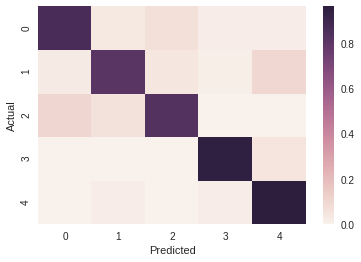

In [23]:
from pandas_ml import ConfusionMatrix

ConfMatrix=ConfusionMatrix(np.argmax(onehot_test,1), np.argmax(pred_probabilities,1))

ConfMatrix.plot(normalized=True,backend='seaborn')

Confusion Matrix:
 [[53  2  4  1  1]
 [ 2 58  3  1  7]
 [ 5  3 40  0  0]
 [ 0  0  0 41  2]
 [ 0  1  0  1 54]]


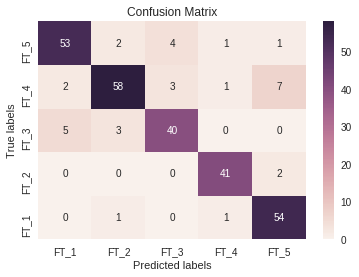

In [24]:
import seaborn as sns

from sklearn.metrics import confusion_matrix as cm

ConfMatrix=cm(np.argmax(onehot_test,1), np.argmax(pred_probabilities,1))

print('Confusion Matrix:\n',ConfMatrix)

ax= plt.subplot()
sns.heatmap(ConfMatrix, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

ax.xaxis.set_ticklabels(['FT_1', 'FT_2','FT_3','FT_4','FT_5'])
ax.yaxis.set_ticklabels(['FT_1', 'FT_2','FT_3','FT_4','FT_5']);

... you can also get useful **History** info...

In [0]:
reset_weights(model)

history=model.fit(train, onehot_train,
         epochs=100,
         batch_size=128,
         validation_data=(test, onehot_test),
         verbose=0)

In [0]:
print(history.history.keys())

reset_weights(model)[-1]

Train Accuracy:  0.99
Test_Accuracy:  0.89


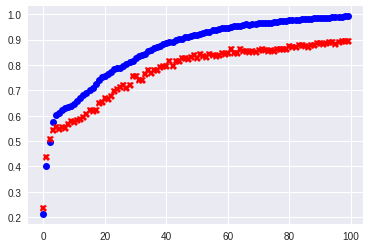

In [29]:
print('Train Accuracy: ',np.round(history.history['acc'][-1],2))
print('Test_Accuracy: ',np.round(history.history['val_acc'][-1],2))

# Plot the accuracy curves
plt.plot(history.history['acc'],'bo')
plt.plot(history.history['val_acc'],'rX')